In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/tested.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [ ]:
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                     

In [ ]:
data.shape

(418, 12)

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
columns = ['Age', 'Fare']
for col in columns:
    data[col].fillna(data[col].median(), inplace = True)

data['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
dup = data.duplicated().sum()
print("The number of duplicated values in the dataset are:",dup)

The number of duplicated values in the dataset are: 0


In [ ]:
for col in data.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(data[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
['Kelly, Mr. James' 'Wilkes, Mrs. James (Ellen Needs)'
 'Myles, Mr. Thomas Francis' 'Wirz, Mr. Albert'
 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)'
 'Svensson, Mr. Johan Cervin' 'Connolly, Miss. Kate'
 'Caldwell, Mr. Albert Francis'
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)' 'Davies, Mr. John Samuel'
 'Ilieff, Mr. Ylio' 'Jones, Mr. Charles Cresson'
 'Snyder, Mrs. John Pillsbury (Nelle Stevenson)' 'Howard, Mr. Benjamin'
 'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)'
 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)' 'Keane, Mr. Daniel'
 'Assaf, Mr. Gerios' 'Ilmakangas, Miss. Ida Livija'
 'Assaf Khalil, Mrs. Mariana (Miriam")"' 'Rothschild, Mr. Martin'
 'Olsen, Master. Artur Karl' 'Flegenheim, Mrs. Alfred (Antoinette)'
 'Williams, Mr. Richard Norris II'
 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)'
 'Robins, Mr. Alexander A' 'Ostby, Miss. Helene Ragnhild'
 'Daher, Mr. Shedid' 'Brady, Mr. John Bertram' 'Samaan, Mr. Elias'
 'Louch, Mr. Charles Alexa

Visulizing the data


In [ ]:


def count_plot(feature):
    # This function takes a feature as input and creates a count plot
    sns.countplot(x=feature, data=data)
    plt.show()
    print("\n")



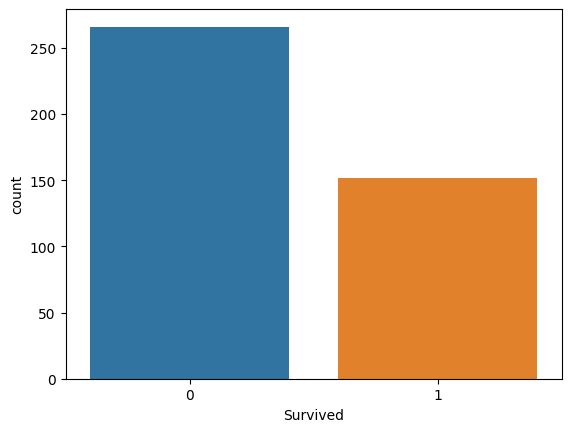

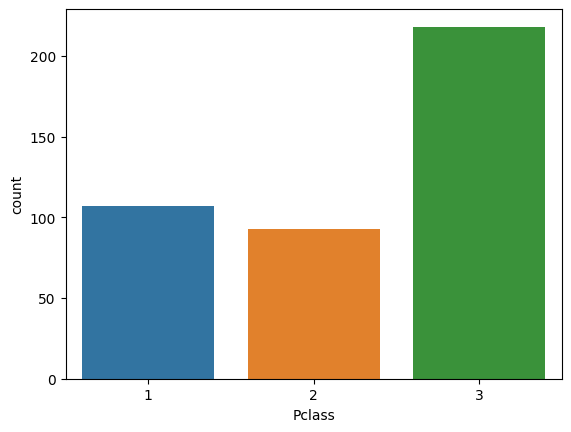

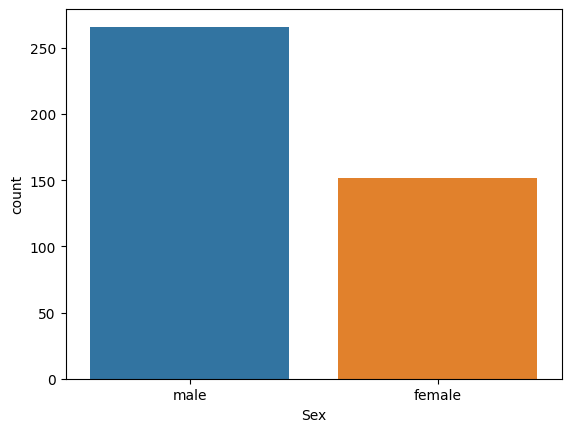

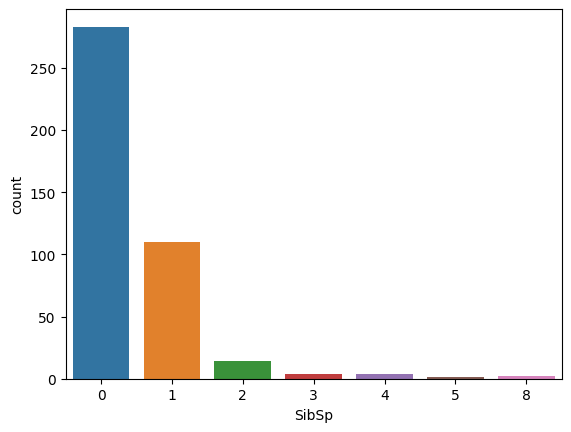

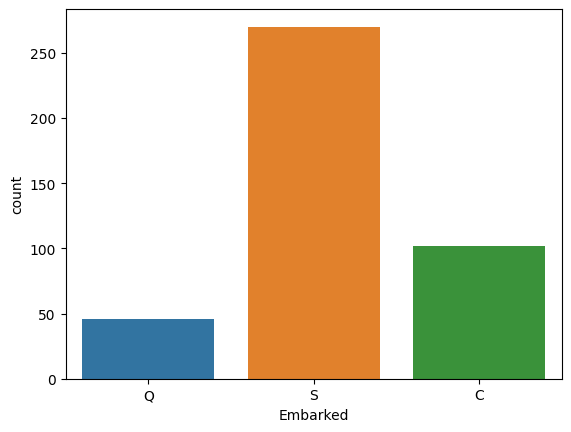

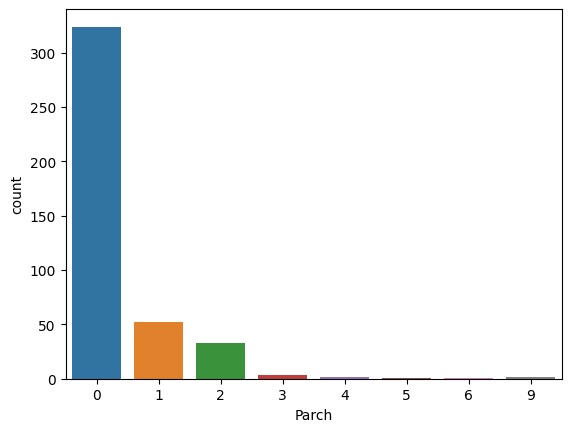

In [ ]:
columns = ['Survived','Pclass','Sex','SibSp','Embarked', 'Parch']
for i in columns:
    count_plot(i)

<Axes: title={'center': 'Age'}, ylabel='Frequency'>

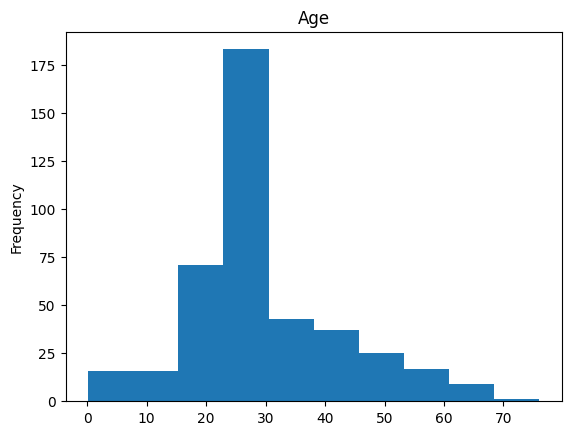

In [ ]:
data["Age"].plot(kind='hist', title = "Age")

In [ ]:


data.groupby('Pclass')['Survived'].value_counts()



Pclass  Survived
1       0            57
        1            50
2       0            63
        1            30
3       0           146
        1            72
Name: Survived, dtype: int64

In [ ]:
data.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         0            62
          1            40
Q         1            24
          0            22
S         0           182
          1            88
Name: Survived, dtype: int64

Pie chart of survival rate

In [ ]:

survived_counts = data['Survived'].value_counts().reset_index()
survived_counts.columns = ['Survived', 'Count']
fig = px.pie(survived_counts, values='Count', names=['No', 'Yes'], title='Survived', labels={'Count': 'Count'}, color = ['No', 'Yes'])
fig.update_traces(textposition='inside',  textinfo='percent+label+value')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide')
fig.show()
